In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LoanData.csv to LoanData (2).csv


In [ ]:
data=pd.read_csv('LoanData.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Understanding
- Loan_ID: Unique Loan ID
    
- Gender:Male/Female
    
- Married: Applicant married
    
- Dependents: Number of Dependents
    
- Education: Application Education
    
- Self_Employed : wheather the applicants it Self employed
    
- ApplicantIncome : Applicant income
    
- CoapplicantIncome : Coapplicant income
    
- LoanAmount : Loan amount in thousands
    
- Loan_Amount_Term : Term of loan in months
    
- Credit_History : credit history meets guidelines
    
- Property_Area : Urban/Semi Urban/Rural
    
- Loan_Status : Loan approved **target variable**

In [ ]:
data['Loan_ID'].nunique()

614

In [ ]:
data.drop(columns=['Loan_ID'],inplace=True)

In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [ ]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [ ]:
data['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [ ]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [ ]:
data['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [ ]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
data['Credit_History'].replace({0:'bad',1:'good'},inplace=True)

In [ ]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [ ]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [ ]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [ ]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
continous=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
discrete_categorial=['Gender', 'Married','Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

## Exploratory Data Analysis(EDA)

**for continous Variables**

In [ ]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


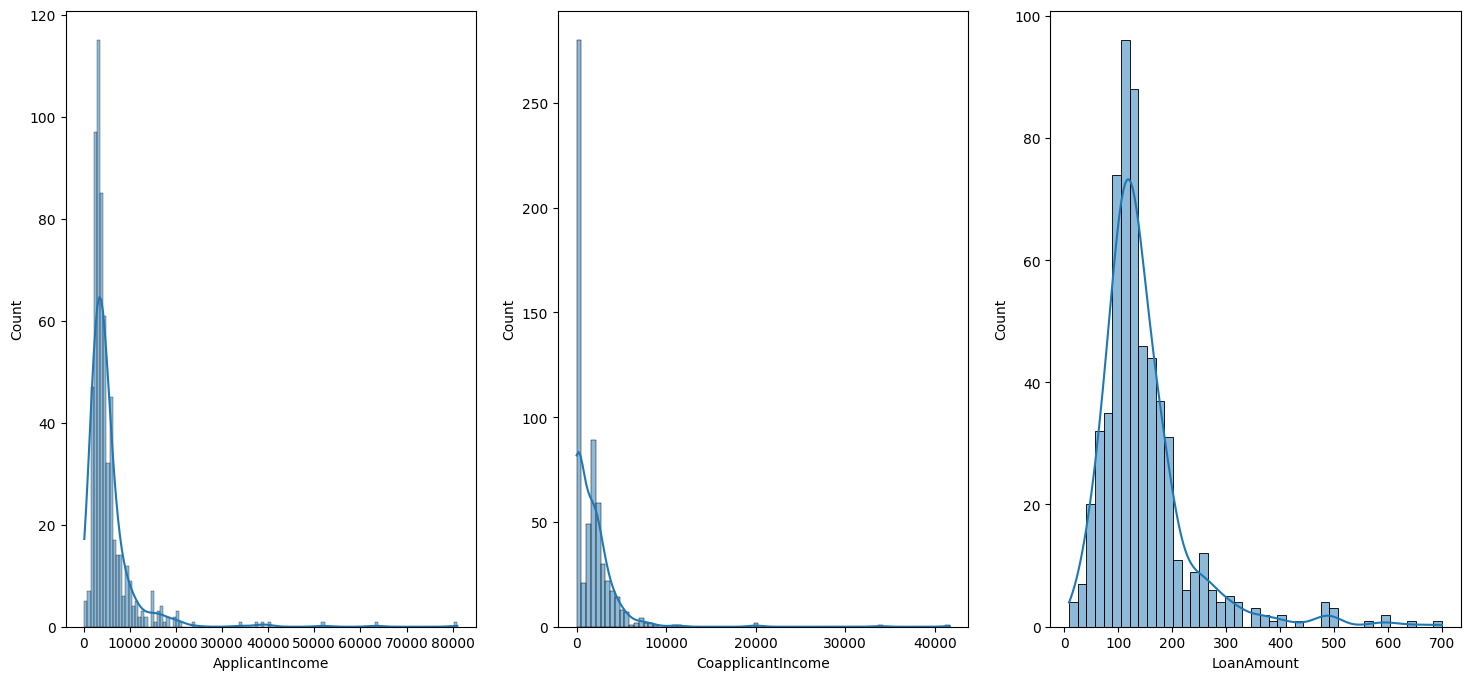

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)
plt.show()

In [ ]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

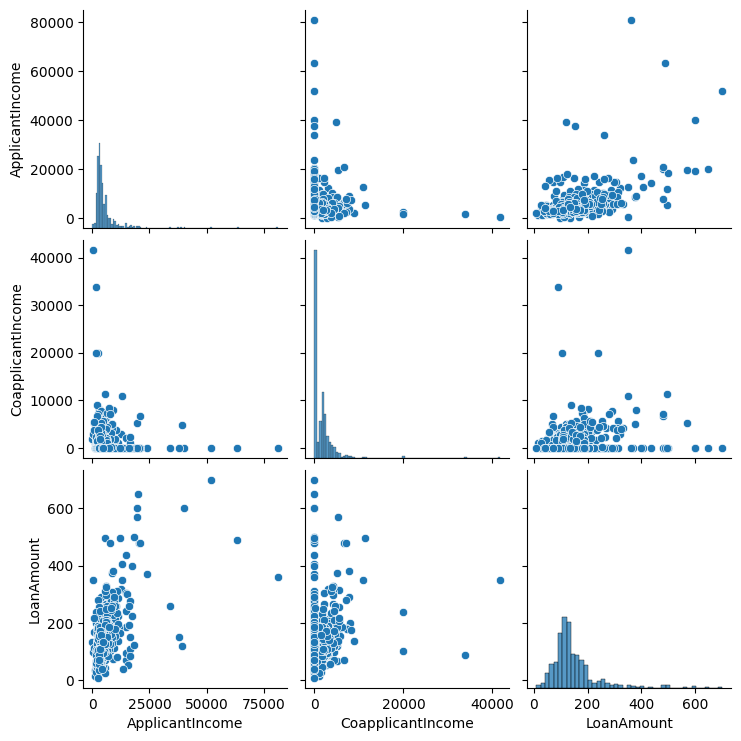

In [ ]:
sns.pairplot(data[continous])
plt.show()

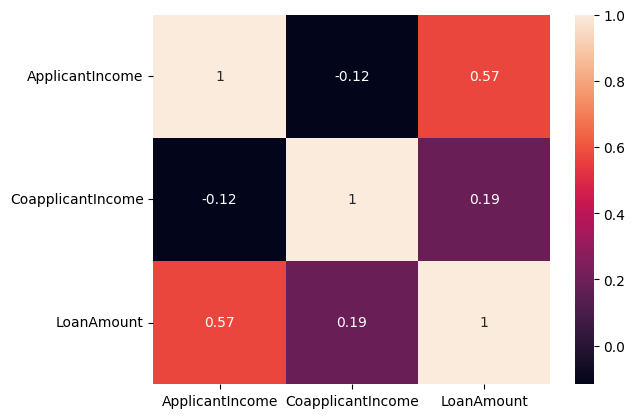

In [ ]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

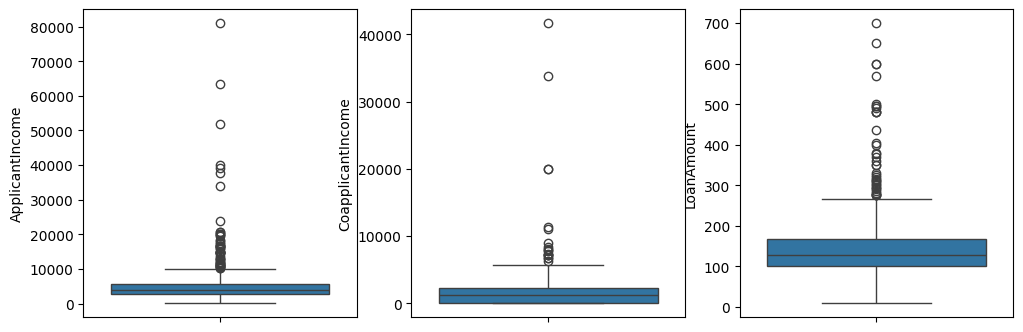

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.show()

**for Discrete Variables**

In [ ]:
data[discrete_categorial].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


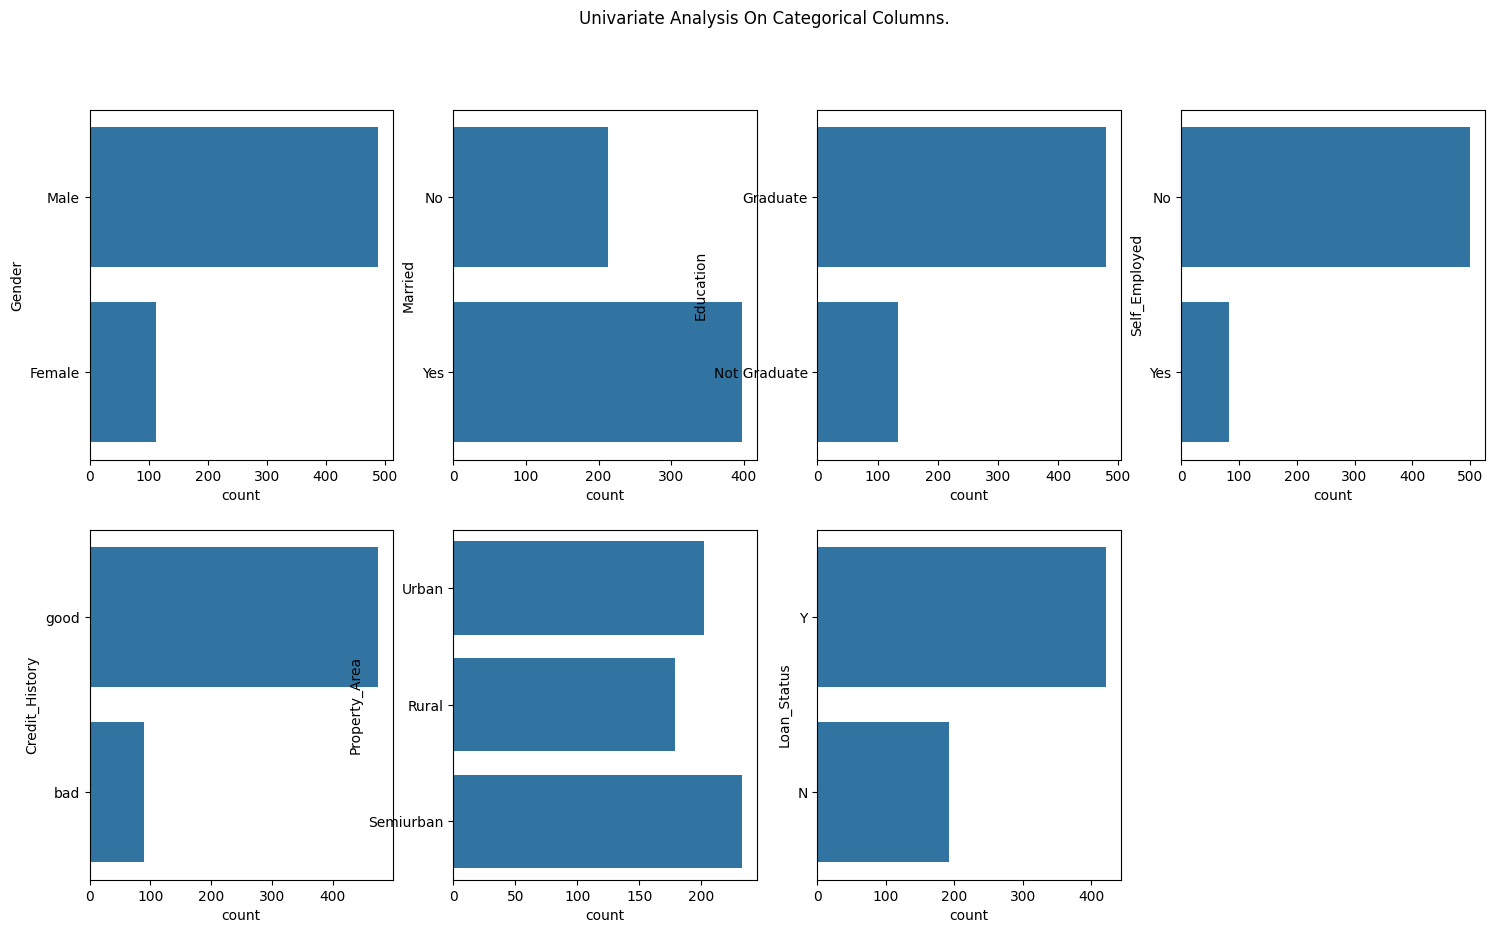

In [ ]:
plt.figure(figsize=(18,10))


plt.subplot(2,4,1)
sns.countplot(y=data['Gender'])

plt.subplot(2,4,2)
sns.countplot(y=data['Married'])

plt.subplot(2,4,3)
sns.countplot(y=data['Education'])

plt.subplot(2,4,4)
sns.countplot(y=data['Self_Employed'])

plt.subplot(2,4,5)
sns.countplot(y=data['Credit_History'])

plt.subplot(2,4,6)
sns.countplot(y=data['Property_Area'])

plt.subplot(2,4,7)
sns.countplot(y=data['Loan_Status'])

plt.suptitle('Univariate Analysis On Categorical Columns.')
plt.show()


# Data Preparation

In [ ]:
data['Income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [ ]:
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

**Modify the wrong data**

In [ ]:
data['Dependents'].replace({'3+':3},inplace=True)

**Missing Values Treatment**

In [ ]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [ ]:
data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [ ]:
# count variable replace with zero
data['Dependents']=data['Dependents'].fillna(0)

In [ ]:
# categorical variables replace with mode.
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

**outliers treatment**

**Encoding**

In [ ]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
data['Credit_History']=data['Credit_History'].map({'good':1,'bad':0}).astype('int')
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

**data type conversion**

In [ ]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')

In [ ]:
data.dtypes

Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
LoanAmount          float64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status           int64
Income              float64
dtype: object

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,128.0,360,1,0,0,6091.0
2,1,1,0,1,1,66.0,360,1,2,1,3000.0
3,1,1,0,0,0,120.0,360,1,2,1,4941.0
4,1,0,0,1,0,141.0,360,1,2,1,6000.0
5,1,1,2,1,1,267.0,360,1,2,1,9613.0


**transformations**

In [ ]:
data[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [ ]:
from scipy.stats import boxcox
data['Income'],a=boxcox(data['Income'])
data['LoanAmount'],c=boxcox(data['LoanAmount'])

In [ ]:
data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [ ]:
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1,1.868932


**X & y**

In [ ]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

**identify the best random state number**

In [ ]:
train=[]
test=[]
cv=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    from sklearn.linear_model import LogisticRegression
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    ypred_train=lg.predict(X_train)
    ypred_test=lg.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score
    train.append(accuracy_score(y_train,ypred_train))
    test.append(accuracy_score(y_test,ypred_test))
    cv.append(cross_val_score(lg,X_train,y_train,cv=5,scoring='accuracy').mean())
em=pd.DataFrame({'train':train,'test':test,'cv':cv})
gm=em[(abs(em['train']-em['test'])<=0.05) & (abs(em['test']-em['cv'])<=0.05)]
rs=gm[gm['cv']==gm['cv'].max()].index.to_list()[0]
print('best random state number is :',rs)

best random state number is : 70


**train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
158,1,0,0,1,0,6.138816,30.0,1,0,1.863067
119,0,0,0,1,0,7.428854,30.0,1,2,1.869529
448,1,1,2,1,0,6.502836,30.0,0,0,1.863039
519,0,0,0,0,0,5.766309,30.0,1,0,1.858282
391,1,1,3,1,0,7.533593,30.0,1,0,1.868844
...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,1,0,6.730146,30.0,1,2,1.865255
370,0,0,0,1,1,4.928045,30.0,1,1,1.872270
140,1,1,2,1,0,6.852435,30.0,1,0,1.866439
252,1,0,0,0,1,5.909606,30.0,1,0,1.862366


In [ ]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
174,1,1,0,0,1,5.628277,30.0,1,1,1.863103
84,1,1,1,1,0,4.786491,20.0,1,2,1.860321
453,1,1,0,1,0,5.681328,15.0,0,0,1.862820
229,1,0,0,1,1,6.984274,30.0,1,0,1.865445
589,1,1,2,1,1,5.939927,30.0,0,1,1.855156
...,...,...,...,...,...,...,...,...,...,...
191,1,0,0,1,0,6.650688,30.0,1,1,1.870538
526,1,1,0,1,0,5.999056,30.0,1,1,1.859638
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
571,1,1,0,1,0,6.660808,30.0,0,2,1.865689


In [ ]:
y_train

158    1
119    1
448    0
519    0
391    1
      ..
70     1
370    1
140    0
252    1
390    1
Name: Loan_Status, Length: 423, dtype: int64

In [ ]:
y_test

174    0
84     1
453    1
229    1
589    0
      ..
191    0
526    1
2      1
571    0
357    0
Name: Loan_Status, Length: 106, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

**1. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=70)
param_grid={'n_estimators':list(range(0,51))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
model_hp.fit(X_train,y_train)
rf_fi=model_hp.best_estimator_.feature_importances_
index=[i for i,x in enumerate(rf_fi) if x>0]

X_train_rf=X_train.iloc[:,index]
X_test_rf=X_test.iloc[:,index]

rf_model=model_hp.best_estimator_
rf_model.fit(X_train_rf,y_train)
ypred_train=rf_model.predict(X_train_rf)
ypred_test=rf_model.predict(X_test_rf)
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('cross validation score:',cross_val_score(rf_model,X_train_rf,y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.9905437352245863
cross validation score: 0.8063025210084034
test accuracy: 0.7641509433962265


**2. Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
estimator=SVC()
param_grid={'C':[0.01,0.02,0.2,0.3,0.5,0.7,0.9,1.0],'kernel':['linear','rbf','sigmoid','poly']}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
model_hp.fit(X_train,y_train)
svm_model=model_hp.best_estimator_
svm_model.fit(X_train,y_train)
ypred_train=svm_model.predict(X_train)
ypred_test=svm_model.predict(X_test)
print('train accuracy:',accuracy_score(y_train,ypred_train))
print('cross validation score:',cross_val_score(svm_model,X_train,y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8226950354609929
cross validation score: 0.8227731092436976
test accuracy: 0.7830188679245284


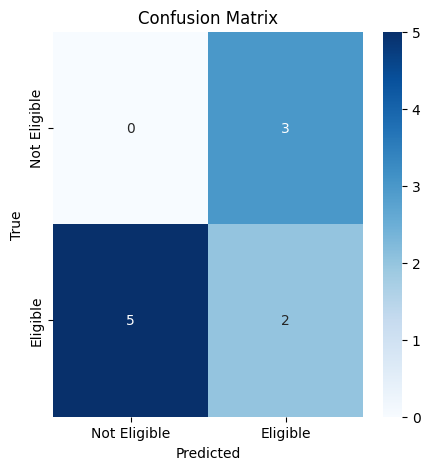

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_train=[1, 1, 0, 0, 1, 1, 1, 0, 1, 1]
y_test=[0, 1, 1, 1, 0, 0, 1, 1, 0, 0]
cm = confusion_matrix(y_train, y_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
